In [25]:
import jax.numpy as jnp
import interpax
import matplotlib.pyplot as plt
import jax

import scienceplots
plt.style.use('science')

jax.config.update("jax_enable_x64", True)


In [26]:

@jax.jit
def get_tangents(gamma_eval, gamma, x, y):
    Interp_x = interpax.Interpolator1D(gamma,x,method='cubic2')
    Interp_y = interpax.Interpolator1D(gamma,y,method='cubic2')

    dx_dgamma = jax.grad(Interp_x)(gamma_eval)
    dy_gamma = jax.grad(Interp_y)(gamma_eval)
    mag = jnp.sqrt(dx_dgamma**2 + dy_gamma**2)

    dx_dgamma_hat = dx_dgamma/mag
    dy_dgamma_hat = dy_gamma/mag
    return jnp.array([dx_dgamma_hat, dy_dgamma_hat])

@jax.jit
def get_tangents_and_curvature(gamma_eval, gamma, x, y):
    tangents = get_tangents(gamma_eval, gamma, x, y)
    curv = jax.jacfwd(get_tangents)(gamma_eval, gamma, x, y)
    curv_mag = jnp.sqrt(curv[0]**2 + curv[1]**2)
    return tangents, curv/curv_mag


In [27]:
gamma = jnp.linspace(-1,1)
x = gamma
y = x**3


T, K = jax.vmap(get_tangents_and_curvature,in_axes=(0,None,None,None))(gamma, gamma, x, y)

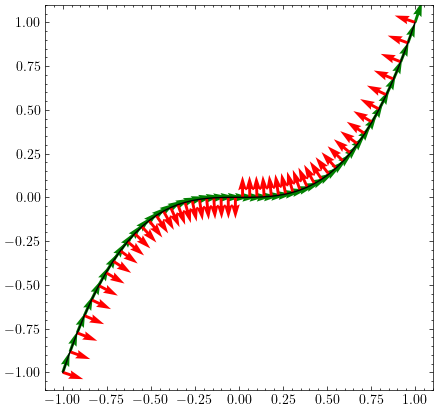

In [31]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)

ax.plot(x,y,color='k')

ax.quiver(x,y,T[:,0], T[:,1],color='g')
ax.quiver(x,y,K[:,0], K[:,1],color='r')

In [32]:
jnp.allclose(jnp.sum(T*K,axis=1),0.)

Array(True, dtype=bool)